<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%206/Week%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

# 3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

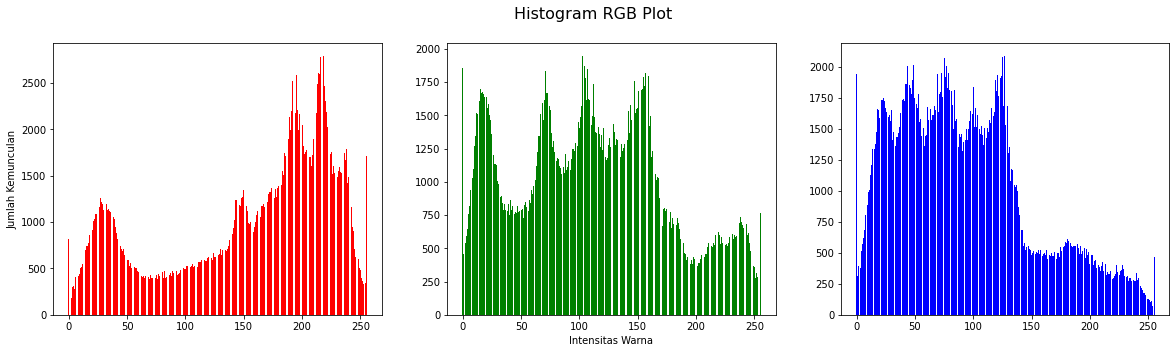

In [192]:
# Input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena.jpg')

# Menghitung jumlah kemunculan setiap pixel warna pada seluruh pixel citra yang ada
hist_R = [0]*256
hist_G = [0]*256
hist_B = [0]*256
for row in img:
    for pixel in row:
        intensity = int(pixel[0])
        hist_B[intensity] += 1
        intensity = int(pixel[1])
        hist_G[intensity] += 1
        intensity = int(pixel[2])
        hist_R[intensity] += 1

# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan
keys = list(range(256))
values_R = hist_R
values_G = hist_G
values_B = hist_B

# # Normalisasi nilai histogram
# values_R = [i/sum(values_R) for i in values_R]
# values_G = [i/sum(values_G) for i in values_G]
# values_B = [i/sum(values_B) for i in values_B]

# Histogram Citra
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Menampilkan histogram Red
ax1.bar(keys, values_R, color='red')
ax1.set_ylabel('Jumlah Kemunculan')

# Menampilkan histogram Green
ax2.bar(keys, values_G, color='green')
ax2.set_xlabel('Intensitas Warna')

# Menampilkan histogram Blue
ax3.bar(keys, values_B, color='blue')

# Menampilkan histogram citra
plt.suptitle('Histogram RGB Plot', fontsize=16)
plt.show()

# End

4.  Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

> Perbedaannya adalah pada cara menghitung histogram untuk setiap channel warna. Pada kode yang menggunakan NumPy, kita menggunakan fungsi np.histogram() untuk menghitung histogram untuk setiap channel warna, sedangkan pada kode yang menggunakan OpenCV, kita menggunakan perulangan for untuk menghitung histogram.

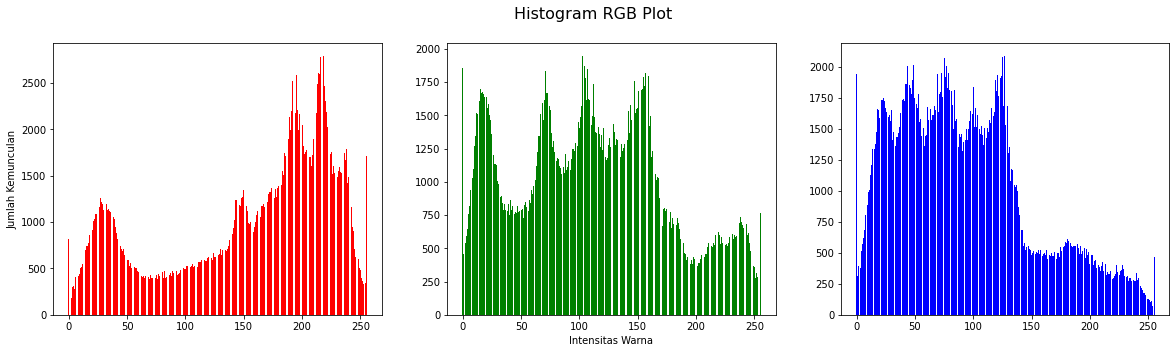

In [193]:
# Input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena.jpg')

# Menghitung histogram untuk setiap channel warna
hist_B, bins = np.histogram(img[:,:,0], bins=256, range=[0, 256])
hist_G, bins = np.histogram(img[:,:,1], bins=256, range=[0, 256])
hist_R, bins = np.histogram(img[:,:,2], bins=256, range=[0, 256])

# Membuat histogram dengan sumbu x adalah intensitas warna dan sumbu y jumlah kemunculan
keys = list(range(256))
values_R = hist_R
values_G = hist_G
values_B = hist_B

# Histogram Citra
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

# Menampilkan histogram Red
ax1.bar(keys, values_R, color='red')
ax1.set_ylabel('Jumlah Kemunculan')

# Menampilkan histogram Green
ax2.bar(keys, values_G, color='green')
ax2.set_xlabel('Intensitas Warna')

# Menampilkan histogram Blue
ax3.bar(keys, values_B, color='blue')

# Menampilkan histogram citra
plt.suptitle('Histogram RGB Plot', fontsize=16)
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

> Start

> Input image 

> Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi)

> Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel

> Normalisasi dengan kumulatif frekuensi seluruh pixel yang sudah diketahui setelah dibagi jumlah pixel

> Implementasi rumus K0, dimana pembagian dengan nilai pixel sudah dilakukan sebelumnya (Skala warna)

> Hasil Histogram Equalization
  
> Transformasi kembali dalam bentuk citra
  
> Citra Hasil Histogram Equalization

> End


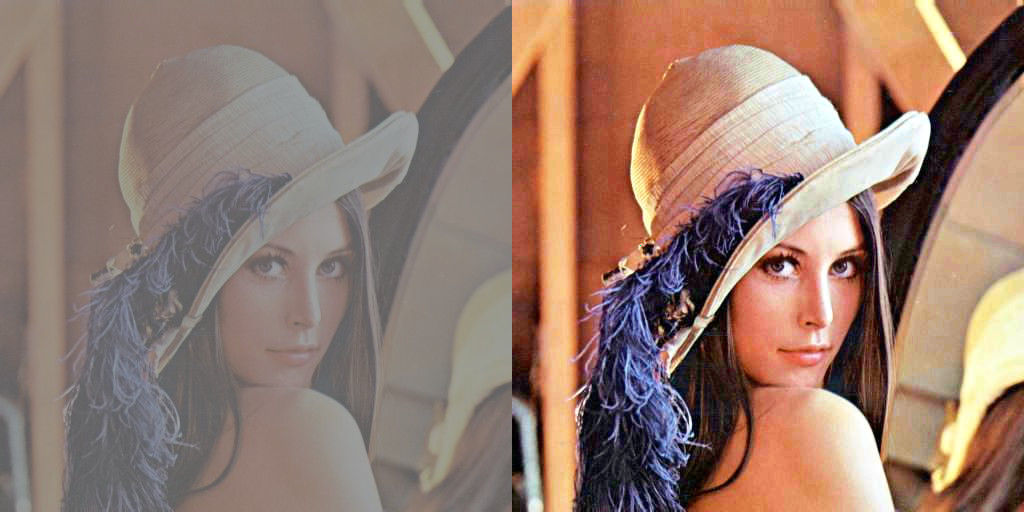

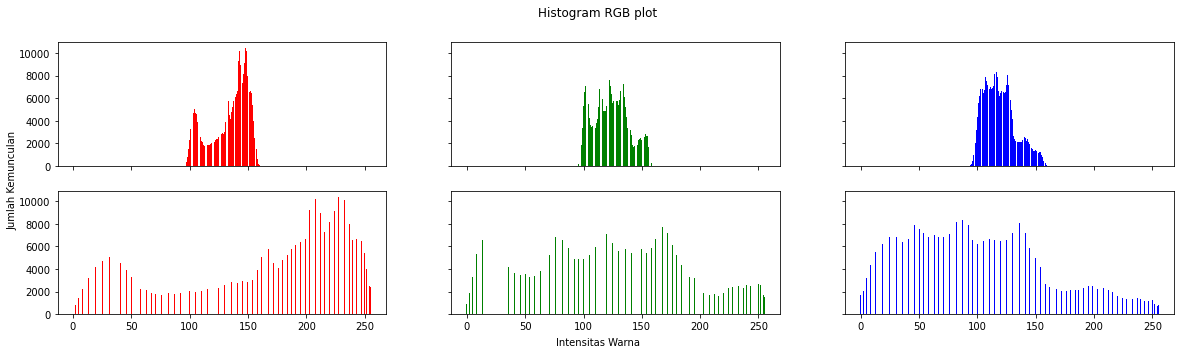

In [194]:
#Start
# Load input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena_lc.jpg')

# Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi).
def histog(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

img_histog = histog(img)

# Convert dari image to numpy array
img_array = np.asarray(img)

# Penjumlahan kumulatif dari frekuensi yang sudah diketahui, kemudian dibagi dengan jumlah pixel
histogram_array = np.bincount(img_array.flatten(), minlength=256)
jum_pixels = np.sum(histogram_array) 
jum_kumulatif = histogram_array/jum_pixels

# Normalisasi dengan kumulatif frekuensi seluruh pixel yang sudah diketahui setelah dibagi jumlah pixel
n_histogram_array = np.cumsum(jum_kumulatif)

# Hitung Nilai K0
K0 = np.ceil(np.max(n_histogram_array) * 255)

# Melakukan pemetaan nilai piksel ke nilai baru dengan menggunakan K0 dan jumlah kumulatif yang telah dinormalisasi.
transform_map = np.floor(K0 * n_histogram_array).astype(np.uint8)

# Melakukan transformasi pada gambar masukan.
img_list = list(img_array.flatten())
eq_img_list = [transform_map[p] for p in img_list]
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img_eq = eq_img_array

# Menghitung frekuensi dari setiap nilai piksel warna pada gambar yang telah di-transformasikan
eq_histog = histog(img_eq)

# Menampilkan gambar masukan dan gambar yang telah di-transformasikan secara berdampingan.
final_frame = cv.hconcat((img, img_eq)) 
cv2_imshow( final_frame)

print()

# Membuat plot histogram RGB dari gambar masukan dan gambar yang telah di-transformasikan.
value = np.arange(256) 
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
fig.suptitle('Histogram RGB plot') 
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
for i in range(3):
    axs[0,i].bar(value, img_histog[2-i], color=['red', 'green', 'blue'][i]) 
    axs[1,i].bar(value, eq_histog[2-i], color=['red', 'green', 'blue'][i])
    
plt.show()

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

  > Setelah membuat histogram citra yang sama akan tetapi menggunakan metode yang berbeda, yaitu menggunakan fungsi equalizeHist yang disediakan oleh library OpenCV (CV2). Hasil output berbeda, tetapi keduanya bertujuan untuk meningkatkan kontras gambar dengan cara menyebar ulang nilai intensitas piksel dalam gambar. Namun, histogram gambar yang dihasilkan dari kedua metode serupa.

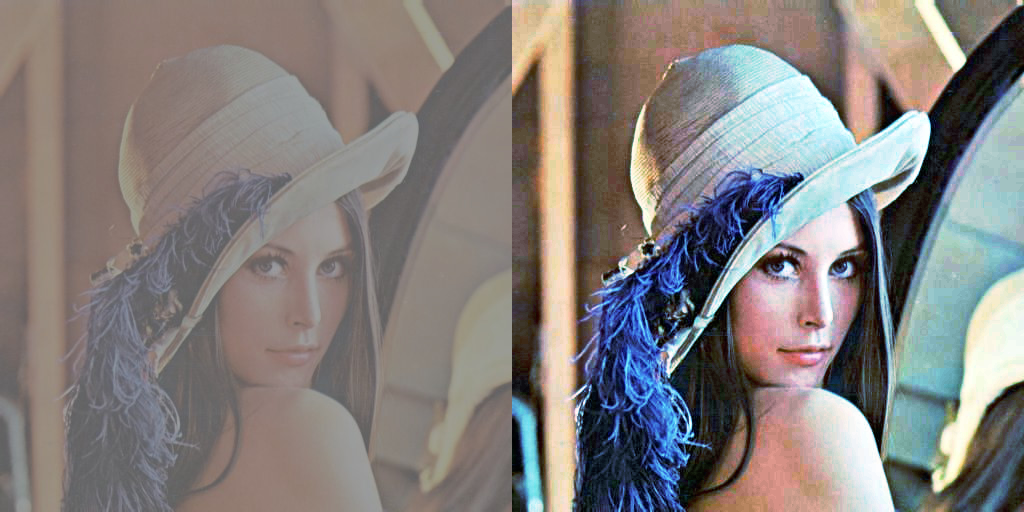

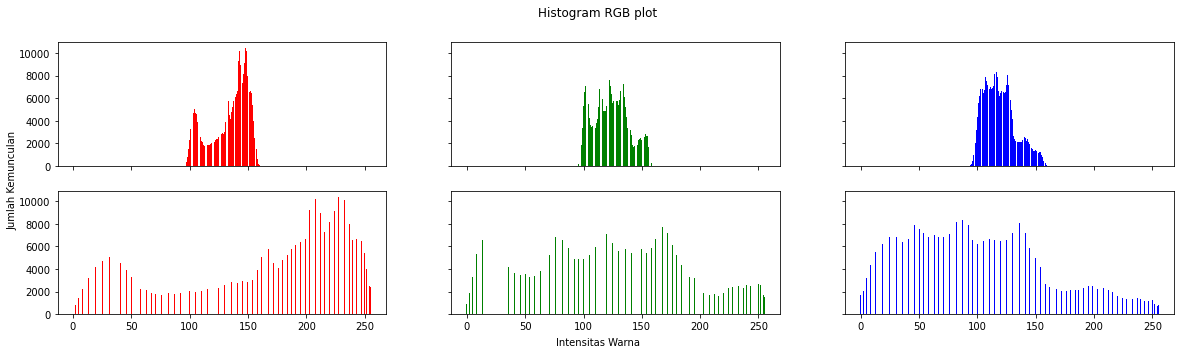

In [195]:
# Load input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena_lc.jpg')

# Mengubah format warna gambar menjadi RGB
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Membagi gambar menjadi tiga saluran warna merah (R), hijau (G), dan biru (B) secara terpisah
r, g, b = cv.split(rgb_img)

# Melakukan ekualisasi histogram pada setiap channel RGB secara terpisah
eq_r = cv.equalizeHist(r)
eq_g = cv.equalizeHist(g)
eq_b = cv.equalizeHist(b)

# menggabungkan setiap channel menjadi satu gambar. 
eq_rgb_img = cv.merge([eq_r, eq_g, eq_b])

# Citra yang sudah digabungkan tadi dikonversi kembali menjadi format BGR
eq_bgr_img = cv.cvtColor(eq_rgb_img, cv.COLOR_RGB2BGR)

# Menampilkan gambar masukan dan gambar yang telah di-transformasikan secara berdampingan.
final_frame = cv.hconcat((img, eq_bgr_img))
cv2_imshow(final_frame)

print()

# Membuat plot histogram RGB dari gambar masukan dan gambar yang telah di-transformasikan.
value = np.arange(256) 
fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
fig.suptitle('Histogram RGB plot') 
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
for i in range(3):
    axs[0,i].bar(value, img_histog[2-i], color=['red', 'green', 'blue'][i]) 
    axs[1,i].bar(value, eq_histog[2-i], color=['red', 'green', 'blue'][i])
plt.show()

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)

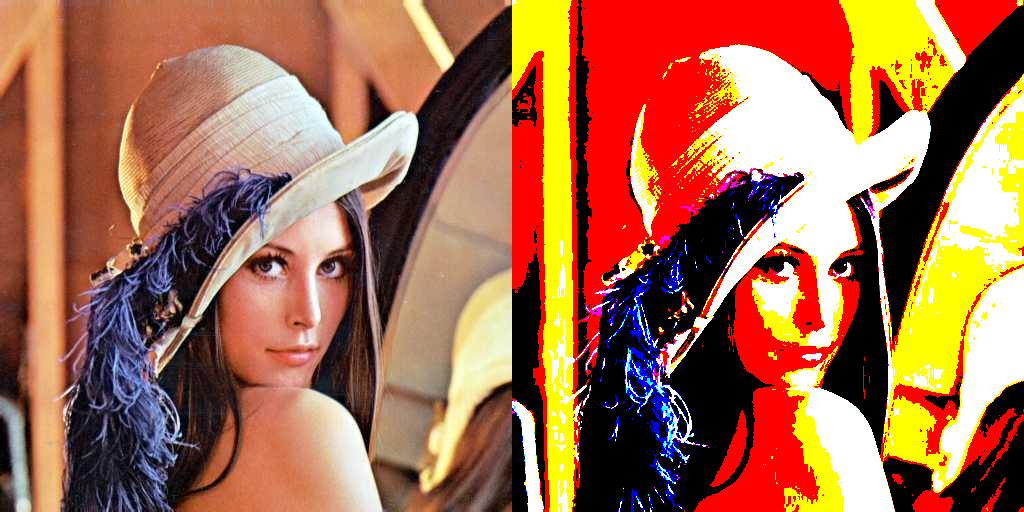

In [196]:
# Mendefinisikan fungsi find_closest_color yang menerima dua parameter yaitu pixel dan palette.
# Fungsi ini mengembalikan warna terdekat di dalam palette dari pixel. Pencarian warna terdekat
# menggunakan lambda function yang menghitung jarak Euclidean antara pixel dan setiap warna di dalam palette.
def find_closest_color(pixel, palette):
    return min(palette, key=lambda x: np.sum((x-pixel)**2))

# Membaca gambar lena.jpg dengan menggunakan OpenCV dan menyimpannya ke dalam variabel img.
# Gambar tersebut kemudian dikonversi dari BGR ke RGB menggunakan fungsi cv.cvtColor()
# dan hasilnya disimpan ke dalam variabel img_rgb.
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mendefinisikan palette sebagai numpy array dengan delapan warna,
# yaitu hitam, merah, hijau, kuning, biru, ungu, cyan, dan putih.
palette = np.array([[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]])

# Mengaplikasikan fungsi find_closest_color() ke setiap piksel gambar dengan menggunakan np.apply_along_axis().
# find_closest_color() dipanggil pada setiap piksel dengan menggunakan lambda function 
# dan dilakukan pada axis ke-2 (channel) dari img_rgb. Hasilnya disimpan ke dalam variabel img_8.
img_8 = np.apply_along_axis(lambda x: find_closest_color(x, palette), 2, img_rgb)

# Mengkonversi gambar 8-bit yang dihasilkan ke dalam format BGR menggunakan cv.cvtColor() dan disimpan ke dalam variabel img_8_bgr.
img_8_bgr = cv.cvtColor(img_8.astype(np.uint8), cv.COLOR_RGB2BGR)

# Menggabungkan gambar asli dan gambar yang sudah di-reduce warnanya, lalu menampilkannya dengan fungsi cv2_imshow().
final_frame = cv.hconcat((img, img_8_bgr))
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini!

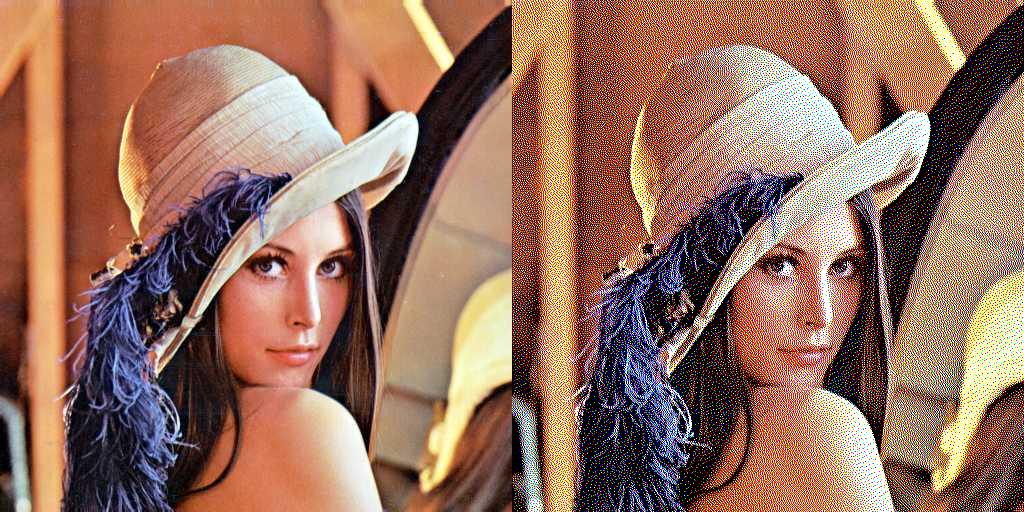

In [197]:
# Membaca citra dari path yang ditentukan menggunakan OpenCV
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena.jpg')

# Membagi citra menjadi tiga saluran warna yang terpisah, yaitu saluran warna biru (b), hijau (g), dan merah (r).
b, g, r = cv.split(img)

# Mengakses setiap piksel pada channel warna, kemudian melakukan operasi thresholding dengan menggunakan nilai threshold 128. 
# Jika nilai piksel lebih kecil dari 128, maka nilainya diubah menjadi 0, 
# dan jika lebih besar atau sama dengan 128, maka nilainya diubah menjadi 255.
for channel in (b, g, r):
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            old_value = channel[y, x]
            new_value = 0 if old_value < 128 else 255
            channel[y, x] = new_value
            # Menghitung selisih antara nilai piksel asli dengan nilai hasil thresholding pada setiap piksel,
            # lalu melakukan operasi distribusi error pada piksel-piksel tetangganya menggunakan algoritma Floyd and Steinberg. 
            # Proses ini dilakukan untuk setiap piksel pada setiap channel warna.
            error = old_value - new_value
            if x < img.shape[1]-1:
                new_number = channel[y, x+1] + error * 7 / 16
                channel[y, x+1] = min(max(0, new_number), 255)
            if x > 0 and y < img.shape[0]-1:
                new_number = channel[y+1, x-1] + error * 3 / 16
                channel[y+1, x-1] = min(max(0, new_number), 255)
            if y < img.shape[0]-1:
                new_number = channel[y+1, x] + error * 5 / 16
                channel[y+1, x] = min(max(0, new_number), 255)
            if y < img.shape[0]-1 and x < img.shape[1]-1:
                new_number = channel[y+1, x+1] + error * 1 / 16
                channel[y+1, x+1] = min(max(0, new_number), 255)

# Menggabungkan tiga channel warna yang telah diproses dithering Floyd and Steinberg tadi,
# lalu digabungkan kembali menjadi gambar berwarna. Hasil gambar ini ditampilkan secara berdampingan 
# dengan gambar asli menggunakan fungsi cv.hconcat() dari OpenCV, kemudian ditampilkan menggunakan fungsi cv2_imshow() dari OpenCV.
img_out = cv.merge((b, g, r))
final_frame = cv.hconcat((img, img_out))
cv2_imshow(final_frame)

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!


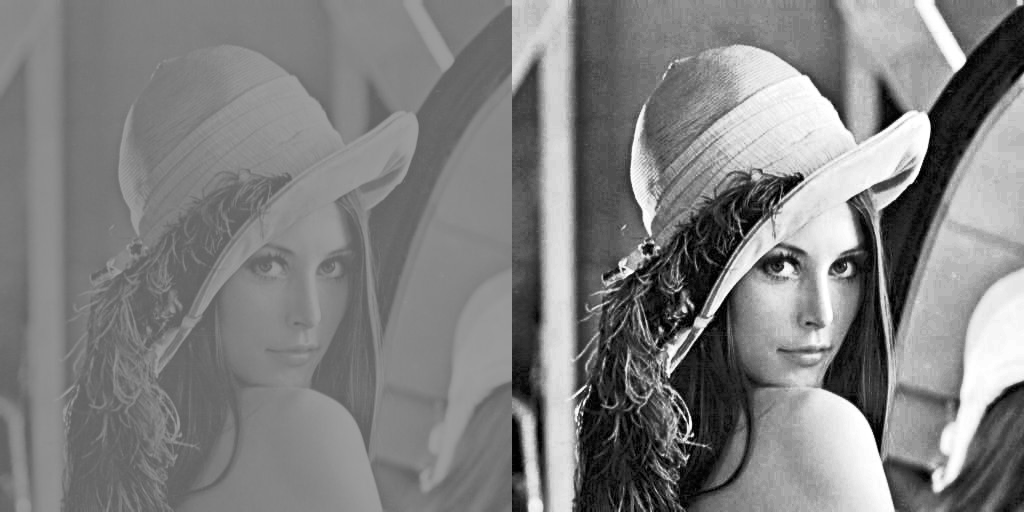

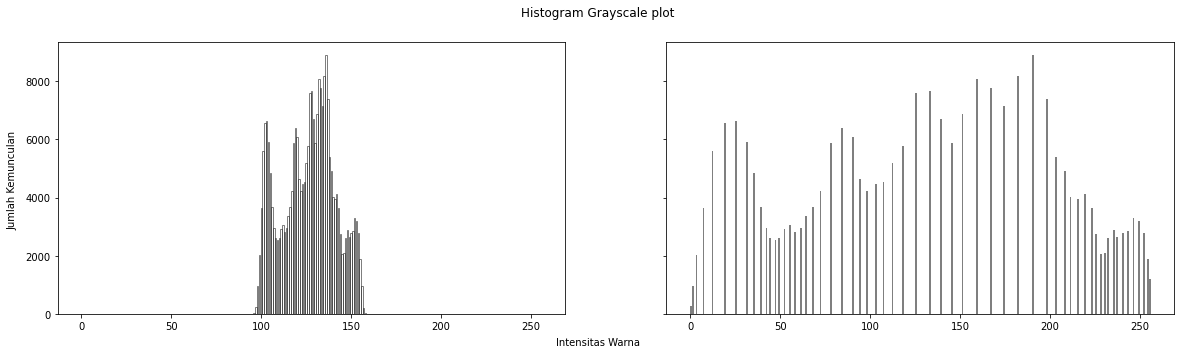

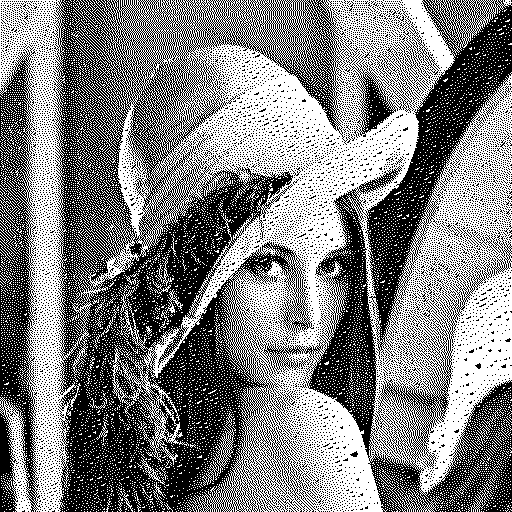

In [198]:
# Load input image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images/lena_lc.jpg')

# Mengubah gambar menjadi grayscale
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Melakukan ekualisasi histogram pada gambar grayscale
eq_gray_img = cv.equalizeHist(gray_img)

# Menampilkan gambar grayscale dan gambar yang telah di-transformasikan secara berdampingan.
final_frame = cv.hconcat((cv.cvtColor(gray_img, cv.COLOR_GRAY2BGR), cv.cvtColor(eq_gray_img, cv.COLOR_GRAY2BGR)))
cv2_imshow(final_frame)

print()
# Membuat plot histogram grayscale dari gambar masukan dan gambar yang telah di-transformasikan.
value = np.arange(256) 
fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
fig.suptitle('Histogram Grayscale plot') 
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
axs[0].bar(value, np.histogram(gray_img.ravel(), bins=256, range=[0, 256])[0], color='w', alpha=0.5, edgecolor='k')
axs[1].hist(eq_gray_img.ravel(), bins=256, range=[0, 256], color='k', alpha=0.5)
plt.show()
print()

# Proses dithering Floyd and Steinberg pada gambar yang telah di-ekualisasi histogramnya
# Menggunakan nilai threshold 128
threshold = 128
for y in range(eq_gray_img.shape[0]):
    for x in range(eq_gray_img.shape[1]):
        old_value = eq_gray_img[y,x]
        new_value = 255 if old_value > threshold else 0
        eq_gray_img[y,x] = new_value
        error = old_value - new_value
        if x < eq_gray_img.shape[1]-1:
            eq_gray_img[y,x+1] += error * 7 / 16
        if x > 0 and y < eq_gray_img.shape[0]-1:
            eq_gray_img[y+1,x-1] += error * 3 / 16
        if y < eq_gray_img.shape[0]-1:
            eq_gray_img[y+1,x] += error * 5 / 16
        if x < eq_gray_img.shape[1]-1 and y < eq_gray_img.shape[0]-1:
            eq_gray_img[y+1,x+1] += error * 1 / 16

# Menampilkan gambar hasil proses dithering Floyd and Steinberg
cv2_imshow(eq_gray_img)